In [57]:
import pickle
import pprint
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [6]:
state = 'florida'
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_common_topics.txt', 'rb'))

In [7]:
pp = pprint.PrettyPrinter(compact = True)
pp.pprint(state_topics)

{'topic0': ['united state', 'state case', 'across united', 'donald trump',
            'case united', 'york time', 'state death', 'president trump',
            'state response', 'death toll', 'travel ban', 'state via',
            'via nyt', 'state economy', 'people united', 'travel europe',
            'president donald', 'confirmed case', 'state health',
            'europe united', 'spread united', 'state testing',
            'president united', 'state airport', 'public health',
            'health official', 'update united', 'washington post', 'sick leave',
            'state stock'],
 'topic1': ['ron desantis', 'sign petition', 'petition via', 'governor ron',
            'rent mortgage', 'suspend rent', 'amp utility', 'mortgage amp',
            'utility payment', 'desantis suspend', 'governor governor',
            'payment sign', 'gov ron', 'outbreak sign', 'ivy league',
            'year eligibility', 'eligibility outbreak', 'ncaa allow',
            'league studentathletes',

In [8]:
state = 'california'
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_common_topics.txt', 'rb'))
pp = pprint.PrettyPrinter(compact = True)
pp.pprint(state_topics)

{'topic0': ['united state', 'state case', 'case united', 'across united',
            'state response', 'york time', 'confirmed case', 'donald trump',
            'president trump', 'state economy', 'state government', 'state via',
            'back united', 'state testing', 'delay testing', 'testing set',
            'set back', 'younger adult', 'state stock', 'everywhere already',
            'already delay', 'update united', 'hospitalization united',
            'travel ban', 'public health', 'travel europe', 'state health',
            'people united', 'spread united', 'president donald'],
 'topic1': ['stay home', 'home stay', 'home order', 'gavin newsom', 'gov gavin',
            'wash hand', 'resident stay', 'people stay', 'californian stay',
            'please stay', 'stay safe', 'ordered stay', 'newsom order',
            'stop spread', 'home avoid', 'order californian', 'statewide stay',
            'million people', 'home except', 'public health', 'order resident',
         

In [ ]:
state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))

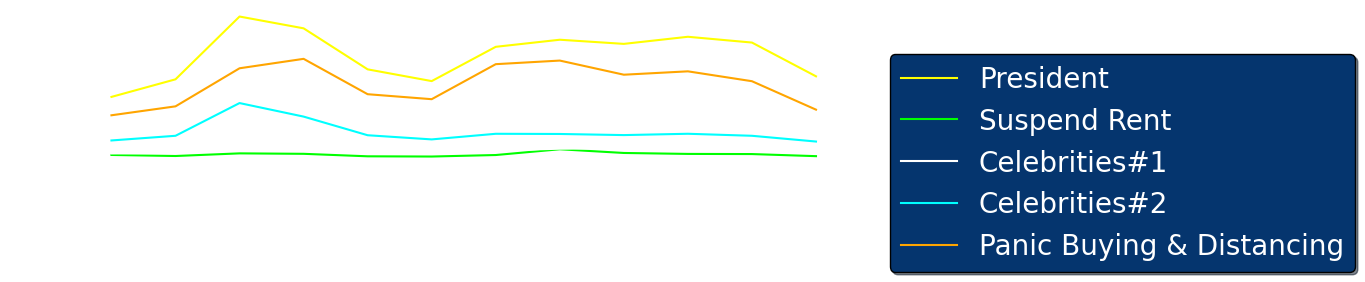

In [90]:
state = 'florida'    
doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_common_doctopic.pkl', 'rb'))

df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
best_topic_nmf = [x.argmax() for x in doc_topic_nmf]
df['topic'] = best_topic_nmf

df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

df_count = df.groupby(['date', 'topic']).id_str.nunique().drop(['2020-03-09', '2020-03-22']).reset_index()
df_count = df_count.pivot(index = 'date', columns='topic', values='id_str')

dates = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in df_count[0].keys().tolist()] 
topic_count = [df_count[x] for x in range(5)]
florida_topics = ['President', 'Suspend Rent', 'Celebrities#1', 'Celebrities#2', 'Panic Buying & Distancing']

c = 'w'
# cm = plt.cm.Pastel1(range(0,5))
cm = ['yellow', 'lime', 'white', 'cyan', 'orange']
plots = []
plt.style.use('default')

with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,2))
    # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
    ax1 = fig.add_subplot(111)

    for i, count in enumerate(topic_count):
        if len(topics) > 0:
            p = ax1.plot(dates, count, label=topics[i], color=cm[i])
        else:
            p = ax1.plot(dates, count, label=f'Topic {i}', color=cm[i])
        plots.append(p)
    # ax1.plot(dates, us_cases, color=c)
    # ax1.set_ylabel('Number of Tweets', fontsize=20, color=c)
    ax1.set_xlabel('Date', fontsize=20, color=c)
    # ax1.set_xticklabels(us_dates,fontsize=12)  
    # ax1.set_xticks(np.arange(1,15, 3.0))
    for label in ax1.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    ax1.tick_params(axis="both", labelsize=16)
    legend = ax1.legend([p[0] for p in plots], florida_topics, fontsize=20, facecolor = '#05356ecb',  framealpha=1, frameon = True, edgecolor='black', loc='upper center', bbox_to_anchor=(1.35, 0.8), shadow=True, ncol=1)
    plt.setp(legend.get_texts(), color=c)

plt.savefig(f'tweets/images/{state}_topiccount.png', transparent=True, bbox_inches='tight')

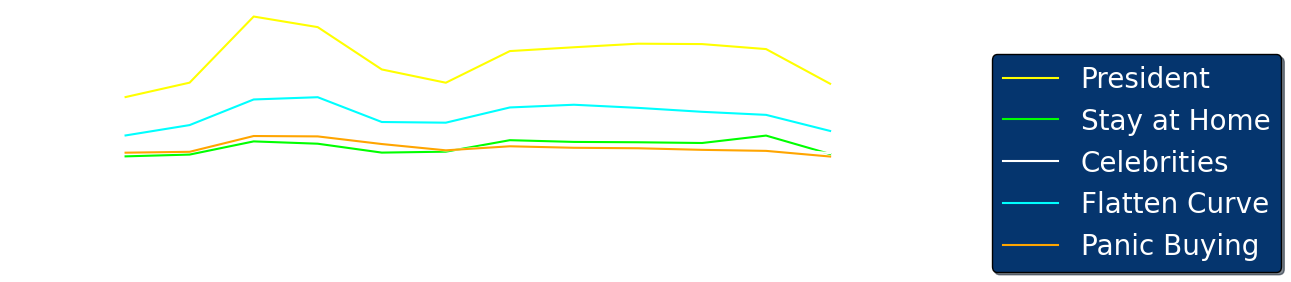

In [91]:
state = 'california'    
doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_common_doctopic.pkl', 'rb'))

df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
best_topic_nmf = [x.argmax() for x in doc_topic_nmf]
df['topic'] = best_topic_nmf

df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

df_count = df.groupby(['date', 'topic']).id_str.nunique().drop(['2020-03-09', '2020-03-22']).reset_index()
df_count = df_count.pivot(index = 'date', columns='topic', values='id_str')

dates = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in df_count[0].keys().tolist()] 
topic_count = [df_count[x] for x in range(5)]
california_topics = ['President', 'Stay at Home', 'Celebrities', 'Flatten Curve', 'Panic Buying']

c = 'w'
# cm = plt.cm.Pastel1(range(0,5))
cm = ['yellow', 'lime', 'white', 'cyan', 'orange']
plots = []
plt.style.use('default')

with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,2))
    # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
    ax1 = fig.add_subplot(111)

    for i, count in enumerate(topic_count):
        if len(topics) > 0:
            p = ax1.plot(dates, count, label=topics[i], color=cm[i])
        else:
            p = ax1.plot(dates, count, label=f'Topic {i}', color=cm[i])
        plots.append(p)
    # ax1.plot(dates, us_cases, color=c)
    # ax1.set_ylabel('Number of Tweets', fontsize=20, color=c)
    ax1.set_xlabel('Date', fontsize=20, color=c)
    # ax1.set_xticklabels(us_dates,fontsize=12)  
    # ax1.set_xticks(np.arange(1,15, 3.0))
    for label in ax1.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
    ax1.tick_params(axis="both", labelsize=16)
    legend = ax1.legend([p[0] for p in plots], california_topics, fontsize=20, facecolor = '#05356ecb',  framealpha=1, frameon = True, edgecolor='black', loc='upper center', bbox_to_anchor=(1.35, 0.8), shadow=True, ncol=1)
    plt.setp(legend.get_texts(), color=c)

plt.savefig(f'tweets/images/{state}_topiccount.png', transparent=True, bbox_inches='tight')